<a href="https://colab.research.google.com/github/AliAlmasiAndabili/test/blob/main/ML-training/logging-trainings-with-WandB/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install dependencies and import packages
First we need to install the libraries we will be using. We will use `numpy` for generic matrix operations and `tensorflow` for deep learning operations such as convolutions, pooling and training (backpropagation).

In [42]:
import sys
!{sys.executable}-m pip install numpy tensorflow
from IPython.display import clear_output
clear_output()
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
!pip install Wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import wandb
wandb.login() 

True

## Create a neural network
Next we define a function that can be used to build a neural network. The neural network is a simple CNN (convolutional neural network) used for classification. The structure of the network is not important for this exercise, you can instead see it as a black box that can be trained to classify an input image.

In [44]:
def create_cnn(input_shape, output_classes):
    return keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(output_classes, activation="softmax"),
        ]
    )

## Prepare the data
The neural network will be trained on a digit classification dataset called *fashion_MNIST*. This code downloads and loads the images together with their true labels. The code also does some preprocessing of the data to make it more suitable for a neural network.

In [45]:

def fashion_mnist_data():
    # Load the data and split it between train and test sets
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

    # Scale images to the [0, 1] range
    x_train = x_train.astype("float32") / 255
    x_test = x_test.astype("float32") / 255

    # Make sure images have shape (28, 28, 1)
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

    # convert class vectors to binary class matrices
    num_classes = 10
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    return (x_train, y_train), (x_test, y_test)

In [11]:
#open data set
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
print(len(train_labels))
print(train_images.shape)

60000
(60000, 28, 28)


In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
print(test_images.shape)
print(len(test_images))


(10000, 28, 28)
10000


In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [27]:
train_images = train_images / 255.0

test_images = test_images / 255.0

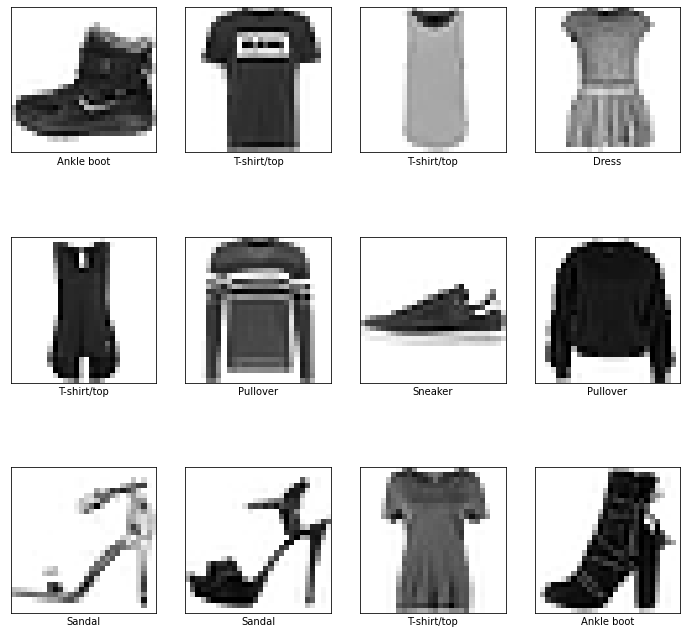

In [40]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Train the network
Finally we will train the network on the data to teach it how to classify a digit. We create a model which expects a 28x28 pixel monocolor image since this is the format the images in the *MNIST* dataset are. We then create an optimizer and calls the `fit()` method to start the training.

In [119]:
batch_size = 10
epochs = 10

In [120]:
wandb.init(project="ai-ml-exercise1", config={"batch_size": batch_size, "epochs": epochs})

accuracy,▁▆▇█
epoch,▁▃▆█
loss,█▃▂▁
val_accuracy,▁▆██
val_loss,█▃▁▁
accuracy,0.91461
best_epoch,3
best_val_loss,0.25662
epoch,3
loss,0.23544
val_accuracy,0.90667


In [121]:
# Get the training data
x_train, y_train = fashion_mnist_data()[0]

In [122]:
# Create a Convolutional Neural Network that
# expects a 28x28 pixel image with 1 color chanel (gray) as input
model = create_cnn((28, 28, 1), 10)

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, validation_split=0.1,
          callbacks=[wandb.keras.WandbCallback()])

Epoch 1/10
5400/5400 [==============================] - ETA: 0s - loss: 0.4296 - accuracy: 0.8461

wandb: Adding directory to artifact (/content/wandb/run-20221214_171011-1fcfrtfe/files/model-best)... Done. 0.0s


5400/5400 [==============================] - 80s 15ms/step - loss: 0.4296 - accuracy: 0.8461 - val_loss: 0.3273 - val_accuracy: 0.8790
Epoch 2/10
5400/5400 [==============================] - ETA: 0s - loss: 0.3009 - accuracy: 0.8919

wandb: Adding directory to artifact (/content/wandb/run-20221214_171011-1fcfrtfe/files/model-best)... Done. 0.0s


5400/5400 [==============================] - 77s 14ms/step - loss: 0.3009 - accuracy: 0.8919 - val_loss: 0.2808 - val_accuracy: 0.8988
Epoch 3/10
5400/5400 [==============================] - ETA: 0s - loss: 0.2595 - accuracy: 0.9058

wandb: Adding directory to artifact (/content/wandb/run-20221214_171011-1fcfrtfe/files/model-best)... Done. 0.0s


5400/5400 [==============================] - 78s 14ms/step - loss: 0.2595 - accuracy: 0.9058 - val_loss: 0.2664 - val_accuracy: 0.9045
Epoch 4/10
5398/5400 [============================>.] - ETA: 0s - loss: 0.2342 - accuracy: 0.9134

wandb: Adding directory to artifact (/content/wandb/run-20221214_171011-1fcfrtfe/files/model-best)... Done. 0.0s


5400/5400 [==============================] - 77s 14ms/step - loss: 0.2341 - accuracy: 0.9134 - val_loss: 0.2630 - val_accuracy: 0.9057
Epoch 5/10
5398/5400 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9216

wandb: Adding directory to artifact (/content/wandb/run-20221214_171011-1fcfrtfe/files/model-best)... Done. 0.0s


5400/5400 [==============================] - 77s 14ms/step - loss: 0.2136 - accuracy: 0.9216 - val_loss: 0.2614 - val_accuracy: 0.9043
Epoch 6/10
5399/5400 [============================>.] - ETA: 0s - loss: 0.1978 - accuracy: 0.9265

wandb: Adding directory to artifact (/content/wandb/run-20221214_171011-1fcfrtfe/files/model-best)... Done. 0.0s


5400/5400 [==============================] - 78s 14ms/step - loss: 0.1978 - accuracy: 0.9265 - val_loss: 0.2525 - val_accuracy: 0.9142
Epoch 7/10
5400/5400 [==============================] - 77s 14ms/step - loss: 0.1856 - accuracy: 0.9322 - val_loss: 0.2598 - val_accuracy: 0.9078
Epoch 8/10
5400/5400 [==============================] - 78s 15ms/step - loss: 0.1719 - accuracy: 0.9370 - val_loss: 0.2744 - val_accuracy: 0.9020
Epoch 9/10
5400/5400 [==============================] - 76s 14ms/step - loss: 0.1645 - accuracy: 0.9397 - val_loss: 0.2710 - val_accuracy: 0.9118
Epoch 10/10
5400/5400 [==============================] - 77s 14ms/step - loss: 0.1541 - accuracy: 0.9436 - val_loss: 0.2621 - val_accuracy: 0.9073
